In [ ]:
pip install pandas

In [ ]:
pip show pandas

In [2]:
import pandas as pd

In [38]:
#using date column as row index
weather = pd.read_csv("./downloads/local_weather.csv", index_col="DATE")

In [32]:
weather

,STATION,NAME,PRCP,TMAX,TMIN
DATE,,,,,
1980-01-01,UKE00105906,"NOTTINGHAM WATNALL, UK",0.00,36.0,26.0
1980-01-02,UKE00105906,"NOTTINGHAM WATNALL, UK",0.12,48.0,25.0
1980-01-03,UKE00105906,"NOTTINGHAM WATNALL, UK",0.26,46.0,24.0
1980-01-04,UKE00105906,"NOTTINGHAM WATNALL, UK",0.00,44.0,32.0
1980-01-05,UKE00105906,"NOTTINGHAM WATNALL, UK",0.01,44.0,34.0
...,...,...,...,...,...
2024-06-26,UKE00105906,"NOTTINGHAM WATNALL, UK",0.00,69.0,57.0
2024-06-27,UKE00105906,"NOTTINGHAM WATNALL, UK",0.00,65.0,61.0
2024-06-28,UKE00105906,"NOTTINGHAM WATNALL, UK",0.00,69.0,56.0


In [39]:
#null values in all columns
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
PRCP       0.011691
TMAX       0.003815
TMIN       0.006461
dtype: float64

In [40]:
#checking out all the values present in PRCP column
weather["PRCP"].value_counts()

PRCP
0.00    7721
0.01    1312
0.02    1072
0.06     479
0.03     396
        ... 
1.22       1
1.99       1
1.40       1
1.19       1
1.30       1
Name: count, Length: 143, dtype: int64

In [41]:
#taking out only required columns for our model
core_weather = weather[["PRCP", "TMAX", "TMIN"]].copy()

In [42]:
core_weather

,PRCP,TMAX,TMIN
DATE,,,
1980-01-01,0.00,36.0,26.0
1980-01-02,0.12,48.0,25.0
1980-01-03,0.26,46.0,24.0
1980-01-04,0.00,44.0,32.0
1980-01-05,0.01,44.0,34.0
...,...,...,...
2024-06-26,0.00,69.0,57.0
2024-06-27,0.00,65.0,61.0
2024-06-28,0.00,69.0,56.0


In [43]:
#changing column names to more suitable type
core_weather.columns = ["precip", "temp_max", "temp_min"]

In [14]:
core_weather

,precip,temp_max,temp_min
DATE,,,
1980-01-01,0.00,36.0,26.0
1980-01-02,0.12,48.0,25.0
1980-01-03,0.26,46.0,24.0
1980-01-04,0.00,44.0,32.0
1980-01-05,0.01,44.0,34.0
...,...,...,...
2024-06-26,0.00,69.0,57.0
2024-06-27,0.00,65.0,61.0
2024-06-28,0.00,69.0,56.0


In [44]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
1995-09-01,NaN,63.0,NaN
1995-09-02,NaN,63.0,NaN
1995-09-03,NaN,68.0,NaN
1995-09-04,NaN,60.0,NaN
1995-09-05,NaN,64.0,NaN
...,...,...,...
2004-07-03,NaN,66.0,51.0
2004-07-22,NaN,72.0,59.0
2004-11-18,NaN,39.0,43.0


In [46]:
#checking if replacing NaN values with '0' is logically correct
core_weather["precip"].value_counts()

precip
0.00    7721
0.01    1312
0.02    1072
0.06     479
0.03     396
        ... 
1.22       1
1.99       1
1.40       1
1.19       1
1.30       1
Name: count, Length: 143, dtype: int64

In [47]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [48]:
core_weather[pd.isnull(core_weather["temp_max"])]

,precip,temp_max,temp_min
DATE,,,
1995-02-28,0.25,NaN,38.0
1995-03-24,0.01,NaN,43.0
1995-03-30,0.05,NaN,31.0
1995-05-18,0.02,NaN,35.0
1995-06-12,0.01,NaN,46.0
...,...,...,...
1997-07-13,0.00,NaN,58.0
1997-07-19,0.00,NaN,50.0
2002-02-18,0.06,NaN,36.0


In [49]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,temp_max,temp_min
DATE,,,
1995-03-01,0.04,43.0,NaN
1995-03-02,0.20,39.0,NaN
1995-03-18,0.04,47.0,NaN
1995-03-25,0.00,53.0,NaN
1995-03-26,0.13,42.0,NaN
...,...,...,...
1997-07-15,0.02,66.0,NaN
1997-07-21,0.00,76.0,NaN
1997-09-16,0.00,69.0,NaN


In [54]:
#filling NaN values in temp_max and temp_min with forward fill method
core_weather = core_weather.fillna(method="ffill")

/var/folders/nb/qnb4xtxj16b8bfxn9cvrfd_00000gn/T/ipykernel_22739/482214448.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  core_weather = core_weather.fillna(method="ffill")


In [56]:
#checking the data types of our columns as ML model will only accept numerical columns
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [57]:
core_weather.index

Index(['1980-01-01', '1980-01-02', '1980-01-03', '1980-01-04', '1980-01-05',
       '1980-01-06', '1980-01-07', '1980-01-08', '1980-01-09', '1980-01-10',
       ...
       '2024-06-21', '2024-06-22', '2024-06-23', '2024-06-24', '2024-06-25',
       '2024-06-26', '2024-06-27', '2024-06-28', '2024-06-29', '2024-06-30'],
      dtype='object', name='DATE', length=16252)

In [59]:
#since our index is date so we can convert it into a datetime index to allow subsetting month and year from it
core_weather.index = pd.to_datetime(core_weather.index)

In [60]:
core_weather.index

DatetimeIndex(['1980-01-01', '1980-01-02', '1980-01-03', '1980-01-04',
               '1980-01-05', '1980-01-06', '1980-01-07', '1980-01-08',
               '1980-01-09', '1980-01-10',
               ...
               '2024-06-21', '2024-06-22', '2024-06-23', '2024-06-24',
               '2024-06-25', '2024-06-26', '2024-06-27', '2024-06-28',
               '2024-06-29', '2024-06-30'],
              dtype='datetime64[ns]', name='DATE', length=16252, freq=None)

In [61]:
core_weather.index.year

Index([1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980, 1980,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='DATE', length=16252)

<Axes: xlabel='DATE'>

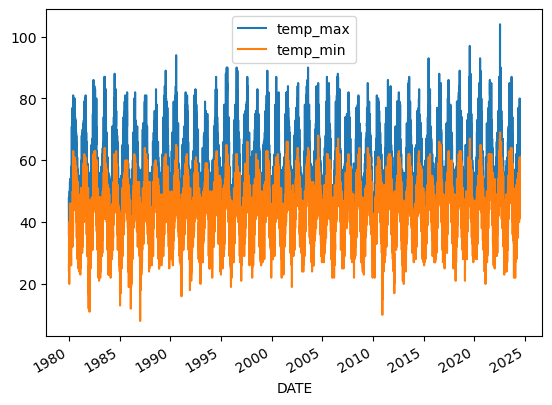

In [64]:
core_weather[["temp_max", "temp_min"]].plot()

In [65]:
#this plot shows that there is no data missing for any year and any possible outliers

<Axes: xlabel='DATE'>

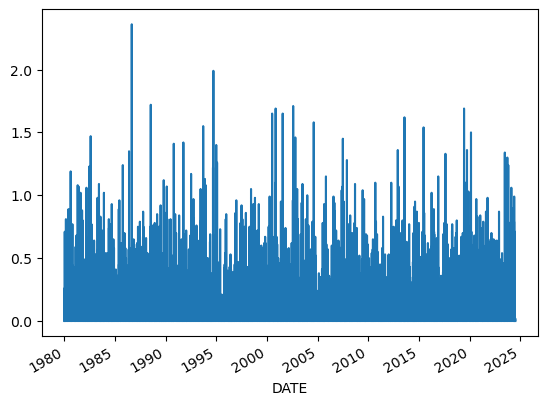

In [66]:
core_weather["precip"].plot()

In [97]:
#adding a target variable to our pandas dataframe for our ML model
#we will shift the "temp_max" column values up 1 position to the "target" column so that it is predicting tomorrow's temp
core_weather["target"] = core_weather["temp_max"].shift(-1)

/var/folders/nb/qnb4xtxj16b8bfxn9cvrfd_00000gn/T/ipykernel_22739/1840948570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_weather["target"] = core_weather["temp_max"].shift(-1)


In [98]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1980-01-01,0.00,36.0,26.0,48.0
1980-01-02,0.12,48.0,25.0,46.0
1980-01-03,0.26,46.0,24.0,44.0
1980-01-04,0.00,44.0,32.0,44.0
1980-01-05,0.01,44.0,34.0,41.0
...,...,...,...,...
2024-06-25,0.00,80.0,60.0,69.0
2024-06-26,0.00,69.0,57.0,65.0
2024-06-27,0.00,65.0,61.0,69.0


In [99]:
core_weather = core_weather.iloc[:-1, :]

In [100]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1980-01-01,0.00,36.0,26.0,48.0
1980-01-02,0.12,48.0,25.0,46.0
1980-01-03,0.26,46.0,24.0,44.0
1980-01-04,0.00,44.0,32.0,44.0
1980-01-05,0.01,44.0,34.0,41.0
...,...,...,...,...
2024-06-24,0.00,80.0,60.0,80.0
2024-06-25,0.00,80.0,60.0,69.0
2024-06-26,0.00,69.0,57.0,65.0


In [101]:
#importing Ridge Linear Regression model to reduce overfitting
from sklearn.linear_model import Ridge

In [102]:
#initialising the model
reg = Ridge(alpha=0.1)

In [103]:
#columns which act as features for our model
predictors = ["precip", "temp_max", "temp_min"]

In [105]:
#splitting data into training and test data
train = core_weather.loc[:"2020-12-31", :]
test = core_weather.loc["2021-01-01":, :]

In [107]:
#fit our model to the training set
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [108]:
#making predictions with our model from the test data
predictions = reg.predict(test[predictors])

In [109]:
from sklearn.metrics import mean_absolute_error

In [110]:
#calculating error in our predictions
mean_absolute_error(test["target"], predictions)

np.float64(3.470951424270214)

In [117]:
#combining the actual and predicted values in a dataframe
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predicted"]

In [118]:
combined

,actual,predicted
DATE,,
2021-01-01,39.0,37.514661
2021-01-02,41.0,40.222315
2021-01-03,38.0,42.040257
2021-01-04,39.0,39.920905
2021-01-05,33.0,40.641817
...,...,...
2024-06-24,80.0,78.197928
2024-06-25,69.0,78.197928
2024-06-26,65.0,68.648854


<Axes: xlabel='DATE'>

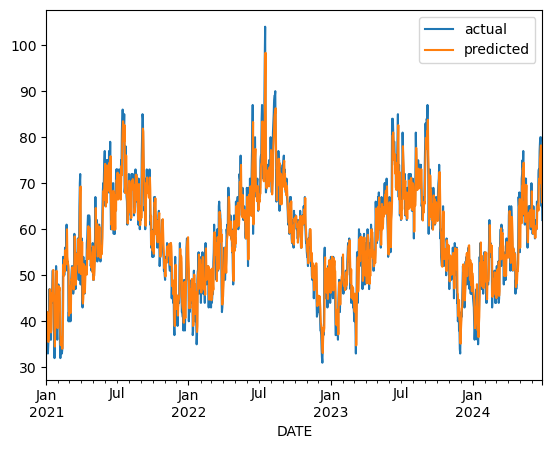

In [119]:
combined.plot()

In [124]:
#parameters of our model
reg.coef_

array([-0.36152868,  0.83423372,  0.12416774])